In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'social-media-and-mental-health:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2752689%2F6154312%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240514%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240514T145335Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3952f3fc68ff55e2f23468dd7579354bd8172fa054ce709e3f4c6cbbd15e643aaddf70b22b3289d5f7e2da5172aa7725403007f59e458cc88a7c166763e9991b224c97d359c663545b6aa3ba59e029042da5d13ef86f6474d222842f06fb12e7947e42e5c5bb4b4fb1fdb889744b2891f150af945db0334b54bda917a7ae6cb8c07d8ce890baf087920d69bb056374c4fd4567a0ff2b831da64bacea3cc5fdf94ac78d0e16b050b226e2cff1d54f90d14180e1ab46627db027b301044348fcce908d0ec67b70d8009abce1bc043742de6b335b0a784a4de5768cecd21f67f405ae3f2122935f333189cfe7d5444f7bf248f5aee2196e56af79a5ffe8bc429a43'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 10944 bytes downloaded
Downloaded and uncompressed: social-media-and-mental-health
Data source import complete.


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/social-media-and-mental-health/smmh.csv


In [ ]:
smmh = pd.read_csv('/kaggle/input/social-media-and-mental-health/smmh.csv')
smmh

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,2,3,3,2,2,3,4,4,5,4


In [ ]:
smmh.shape

(481, 21)

In [ ]:
smmh.columns

Index(['Timestamp', '1. What is your age?', '2. Gender',
       '3. Relationship Status', '4. Occupation Status',
       '5. What type of organizations are you affiliated with?',
       '6. Do you use social media?',
       '7. What social media platforms do you commonly use?',
       '8. What is the average time you spend on social media every day?',
       '9. How often do you find yourself using Social media without a specific purpose?',
       '10. How often do you get distracted by Social media when you are busy doing something?',
       '11. Do you feel restless if you haven't used Social media in a while?',
       '12. On a scale of 1 to 5, how easily distracted are you?',
       '13. On a scale of 1 to 5, how much are you bothered by worries?',
       '14. Do you find it difficult to concentrate on things?',
       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
       '16. Following the previous question, 

# Renaming the Columns

In [ ]:
import pandas as pd

new_column_names = {
    'Timestamp': 'timestamp',
    '1. What is your age?': 'age',
    '2. Gender': 'gender',
    '3. Relationship Status': 'relationship_status',
    '4. Occupation Status': 'occupation_status',
    '5. What type of organizations are you affiliated with?': 'affiliated_organizations',
    '6. Do you use social media?': 'use_social_media',
    '7. What social media platforms do you commonly use?': 'social_media_platforms',
    '8. What is the average time you spend on social media every day?': 'daily_social_media_time',
    '9. How often do you find yourself using Social media without a specific purpose?': 'frequency_social_media_no_purpose',
    '10. How often do you get distracted by Social media when you are busy doing something?': 'frequency_social_media_distracted',
    "11. Do you feel restless if you haven't used Social media in a while?": 'restless_without_social_media',
    '12. On a scale of 1 to 5, how easily distracted are you?': 'distractibility_scale',
    '13. On a scale of 1 to 5, how much are you bothered by worries?': 'worry_level_scale',
    '14. Do you find it difficult to concentrate on things?': 'difficulty_concentrating',
    '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?': 'compare_to_successful_people_scale',
    '16. Following the previous question, how do you feel about these comparisons, generally speaking?': 'feelings_about_comparisons',
    '17. How often do you look to seek validation from features of social media?': 'frequency_seeking_validation',
    '18. How often do you feel depressed or down?': 'frequency_feeling_depressed',
    '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?': 'interest_fluctuation_scale',
    '20. On a scale of 1 to 5, how often do you face issues regarding sleep?': 'sleep_issues_scale',
}

smmh = smmh.rename(columns=new_column_names)


In [ ]:
smmh

,timestamp,age,gender,relationship_status,occupation_status,affiliated_organizations,use_social_media,social_media_platforms,daily_social_media_time,frequency_social_media_no_purpose,...,restless_without_social_media,distractibility_scale,worry_level_scale,difficulty_concentrating,compare_to_successful_people_scale,feelings_about_comparisons,frequency_seeking_validation,frequency_feeling_depressed,interest_fluctuation_scale,sleep_issues_scale
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,...,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,...,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,...,2,3,3,2,2,3,4,4,5,4


In [ ]:
smmh_copy = smmh.copy()
smmh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   timestamp                           481 non-null    object 
 1   age                                 481 non-null    float64
 2   gender                              481 non-null    object 
 3   relationship_status                 481 non-null    object 
 4   occupation_status                   481 non-null    object 
 5   affiliated_organizations            451 non-null    object 
 6   use_social_media                    481 non-null    object 
 7   social_media_platforms              481 non-null    object 
 8   daily_social_media_time             481 non-null    object 
 9   frequency_social_media_no_purpose   481 non-null    int64  
 10  frequency_social_media_distracted   481 non-null    int64  
 11  restless_without_social_media       481 non-n

In [ ]:
smmh.isnull().sum()

timestamp                              0
age                                    0
gender                                 0
relationship_status                    0
occupation_status                      0
affiliated_organizations              30
use_social_media                       0
social_media_platforms                 0
daily_social_media_time                0
frequency_social_media_no_purpose      0
frequency_social_media_distracted      0
restless_without_social_media          0
distractibility_scale                  0
worry_level_scale                      0
difficulty_concentrating               0
compare_to_successful_people_scale     0
feelings_about_comparisons             0
frequency_seeking_validation           0
frequency_feeling_depressed            0
interest_fluctuation_scale             0
sleep_issues_scale                     0
dtype: int64

# Imputing the Null Values

In [ ]:
mode_value = smmh['affiliated_organizations'].mode()[0]
smmh['affiliated_organizations'].fillna(mode_value, inplace=True)

In [ ]:
smmh.isnull().sum()

timestamp                             0
age                                   0
gender                                0
relationship_status                   0
occupation_status                     0
affiliated_organizations              0
use_social_media                      0
social_media_platforms                0
daily_social_media_time               0
frequency_social_media_no_purpose     0
frequency_social_media_distracted     0
restless_without_social_media         0
distractibility_scale                 0
worry_level_scale                     0
difficulty_concentrating              0
compare_to_successful_people_scale    0
feelings_about_comparisons            0
frequency_seeking_validation          0
frequency_feeling_depressed           0
interest_fluctuation_scale            0
sleep_issues_scale                    0
dtype: int64

So our data has no null values. we are going to proceed forward.

In [ ]:
duplicate_rows = smmh[smmh.duplicated()]
duplicate_rows.sum()

timestamp                               0
age                                   0.0
gender                                  0
relationship_status                     0
occupation_status                       0
affiliated_organizations                0
use_social_media                        0
social_media_platforms                  0
daily_social_media_time                 0
frequency_social_media_no_purpose       0
frequency_social_media_distracted       0
restless_without_social_media           0
distractibility_scale                   0
worry_level_scale                       0
difficulty_concentrating                0
compare_to_successful_people_scale      0
feelings_about_comparisons              0
frequency_seeking_validation            0
frequency_feeling_depressed             0
interest_fluctuation_scale              0
sleep_issues_scale                      0
dtype: object

In [ ]:
smmh.columns

Index(['timestamp', 'age', 'gender', 'relationship_status',
       'occupation_status', 'affiliated_organizations', 'use_social_media',
       'social_media_platforms', 'daily_social_media_time',
       'frequency_social_media_no_purpose',
       'frequency_social_media_distracted', 'restless_without_social_media',
       'distractibility_scale', 'worry_level_scale',
       'difficulty_concentrating', 'compare_to_successful_people_scale',
       'feelings_about_comparisons', 'frequency_seeking_validation',
       'frequency_feeling_depressed', 'interest_fluctuation_scale',
       'sleep_issues_scale'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from joblib import dump

smmh['timestamp'] = pd.to_datetime(smmh['timestamp'])

numeric_columns = smmh.select_dtypes(include=['int64', 'float64']).columns
X = smmh[numeric_columns]
X = X.drop(columns=['distractibility_scale'])
y = smmh['distractibility_scale']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
print('Random Forest Mean Absolute Error:', mae_rf)

dump(rf_model, 'random_forest_model.joblib')


Random Forest Mean Absolute Error: 0.5792989690721649


['random_forest_model.joblib']

In [ ]:
print("Columns used during training:", X_train.columns)
print("No of columns used during training:", len(X_train.columns))

Columns used during training: Index(['age', 'frequency_social_media_no_purpose',
       'frequency_social_media_distracted', 'restless_without_social_media',
       'worry_level_scale', 'difficulty_concentrating',
       'compare_to_successful_people_scale', 'feelings_about_comparisons',
       'frequency_seeking_validation', 'frequency_feeling_depressed',
       'interest_fluctuation_scale', 'sleep_issues_scale'],
      dtype='object')
No of columns used during training: 12


# Descriptive Analysis

    1. What is the average age of the survey respondents?
    2. How is the gender distribution among the respondents?
    3. What are the most common relationship statuses and occupation statuses among the respondents?
    4. Which social media platforms are the most commonly used among the survey participants?
    5. What is the distribution of daily social media usage times among the respondents?
    6. How often do respondents find themselves using social media without a specific purpose, and how does this vary by age and gender?

### What is the average age of the survey respondents, and what is the age distribution in the dataset?

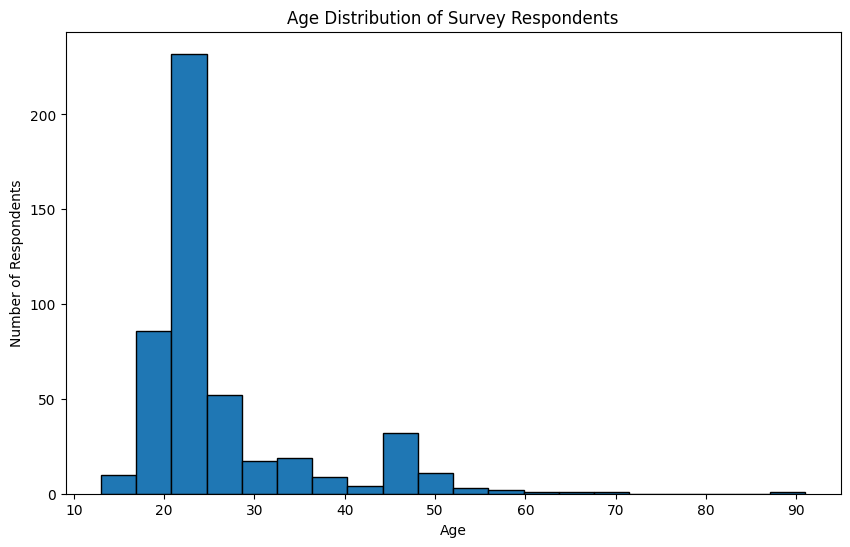

In [ ]:
average_age = smmh['age'].mean()

plt.figure(figsize=(10, 6))
plt.hist(smmh['age'], bins=20, edgecolor='k')
plt.title('Age Distribution of Survey Respondents')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.show()

#### Average Age: 26.14 years

### How is the gender distribution among the respondents?

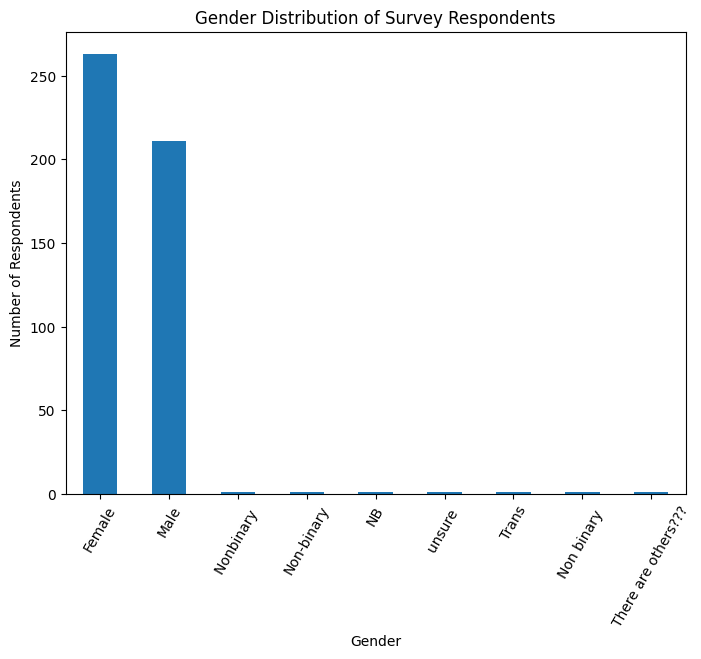

In [ ]:
gender_distribution = smmh['gender'].value_counts()

plt.figure(figsize=(8, 6))
gender_distribution.plot(kind='bar')
plt.title('Gender Distribution of Survey Respondents')
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=60)
plt.show()

### What are the most common relationship statuses and occupation statuses among the respondents?

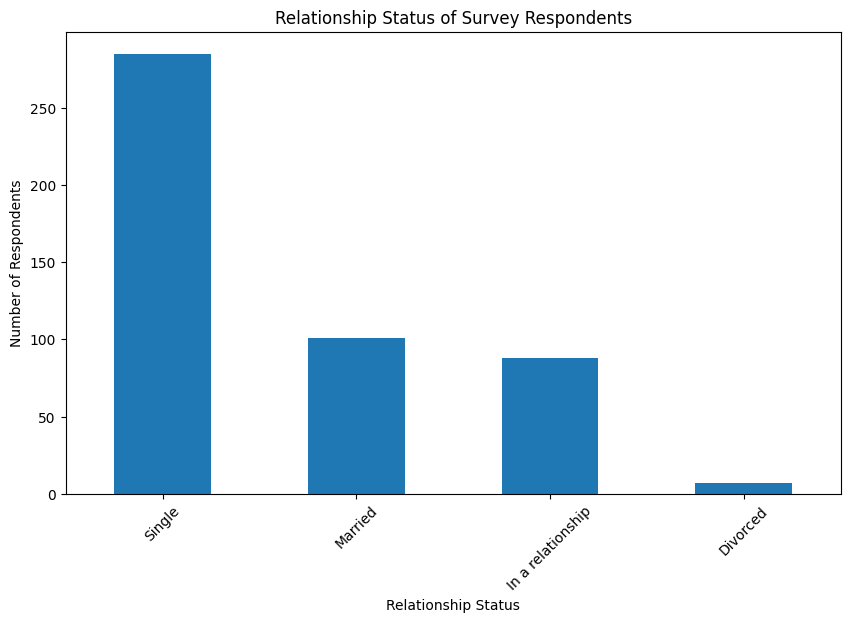

In [ ]:
relationship_statuses = smmh['relationship_status'].value_counts()

plt.figure(figsize=(10, 6))
relationship_statuses.plot(kind='bar')
plt.title('Relationship Status of Survey Respondents')
plt.xlabel('Relationship Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

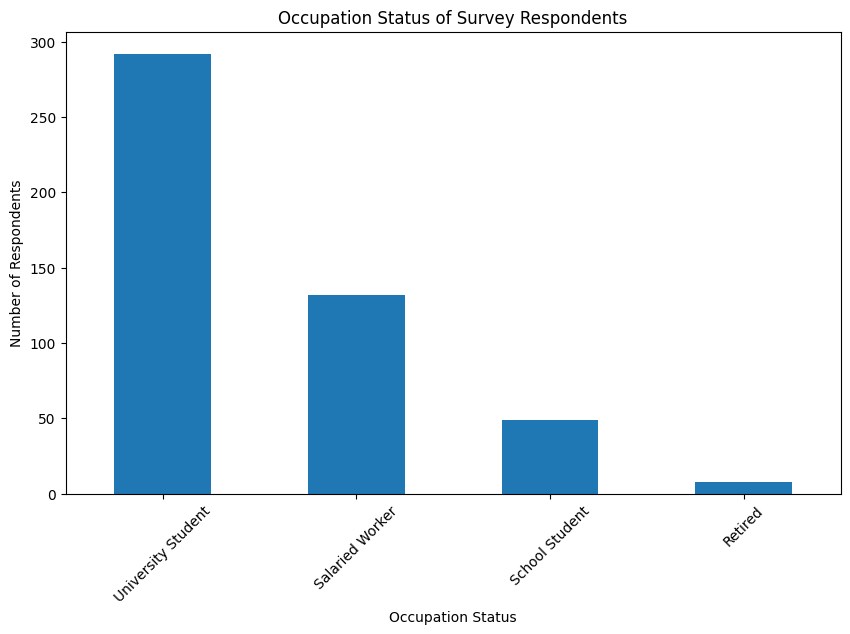

In [ ]:
occupation_statuses = smmh['occupation_status'].value_counts()

plt.figure(figsize=(10, 6))
occupation_statuses.plot(kind='bar')
plt.title('Occupation Status of Survey Respondents')
plt.xlabel('Occupation Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()


### Which social media platforms are the most commonly used among the survey participants?

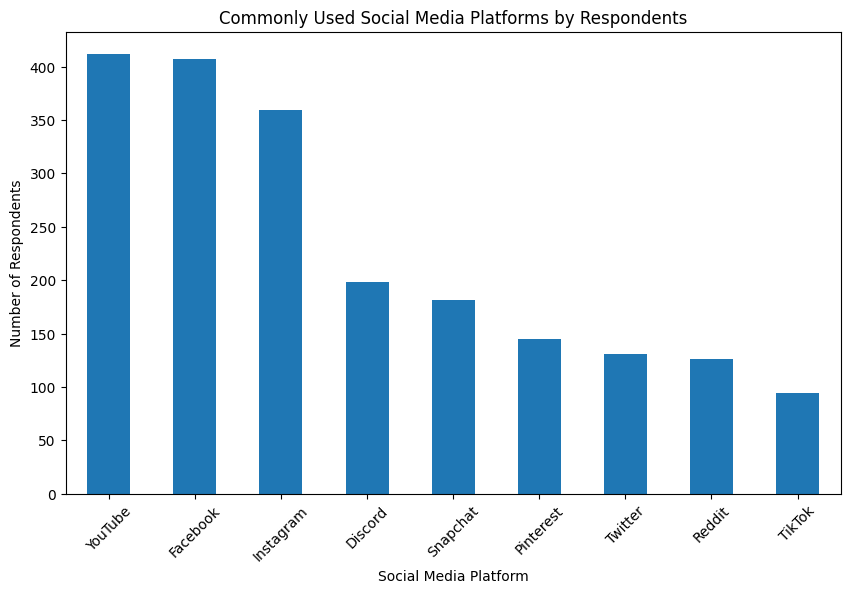

In [ ]:
social_media_platforms = smmh['social_media_platforms'].str.split(', ', expand=True).stack().value_counts()

plt.figure(figsize=(10, 6))
social_media_platforms.plot(kind='bar')
plt.title('Commonly Used Social Media Platforms by Respondents')
plt.xlabel('Social Media Platform')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()


### What is the distribution of daily social media usage times among the respondents?

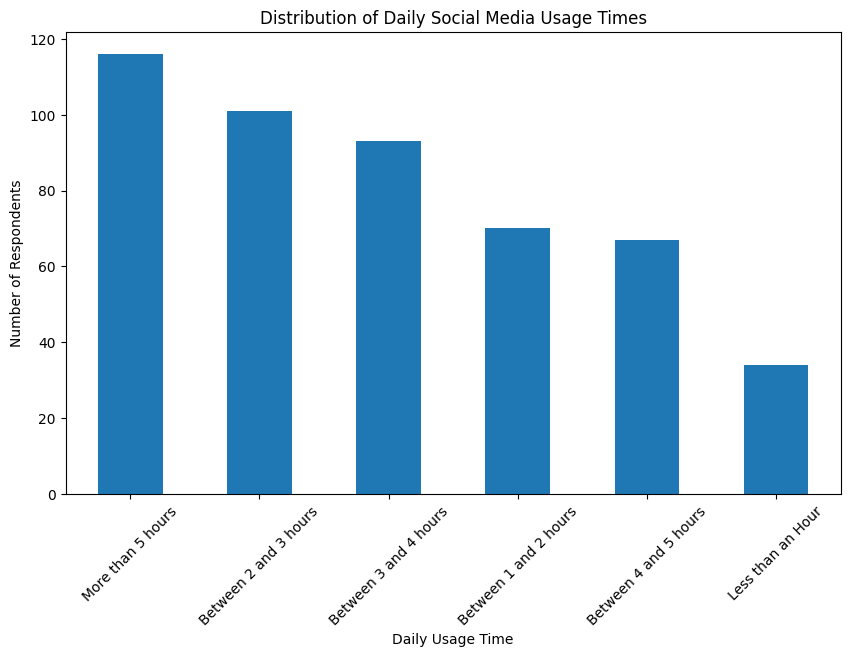

In [ ]:
daily_usage_distribution = smmh['daily_social_media_time'].value_counts()

plt.figure(figsize=(10, 6))
daily_usage_distribution.plot(kind='bar')
plt.title('Distribution of Daily Social Media Usage Times')
plt.xlabel('Daily Usage Time')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()


### How often do respondents find themselves using social media without a specific purpose, and how does this vary by age and gender?

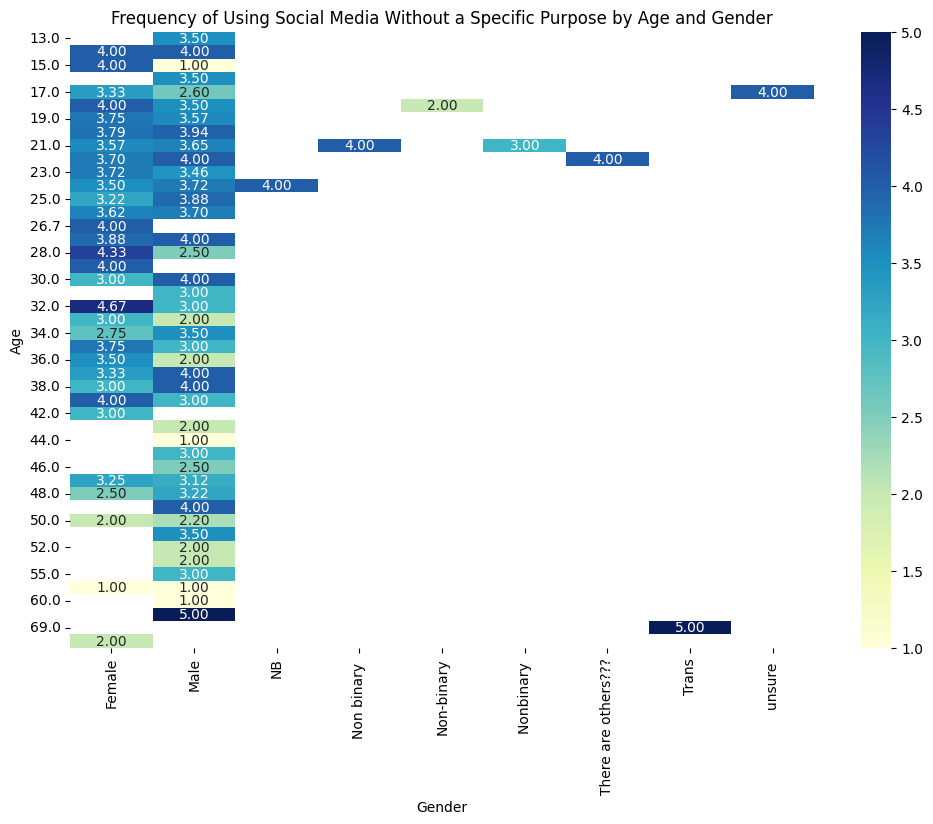

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

freq_by_age_gender = smmh.groupby(['age', 'gender'])['frequency_social_media_no_purpose'].mean().reset_index()

pivot_table = freq_by_age_gender.pivot_table(index='age', columns='gender', values='frequency_social_media_no_purpose')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Frequency of Using Social Media Without a Specific Purpose by Age and Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


# Exploratory Data Analysis (EDA)

    1. Is there a correlation between the time spent on social media and feelings of restlessness when not using it?
    2. Are there any gender-based differences in social media usage patterns and their impact on mental health?
    3. Do younger age groups report more frequent distraction by social media during other activities?
    4. Are people who affiliate with different types of organizations more or less likely to seek validation from social media?

### Is there a correlation between the time spent on social media and feelings of restlessness when not using it?

Correlation between Time Spent on Social Media and Feelings of Restlessness: 0.32


<Figure size 1000x600 with 0 Axes>

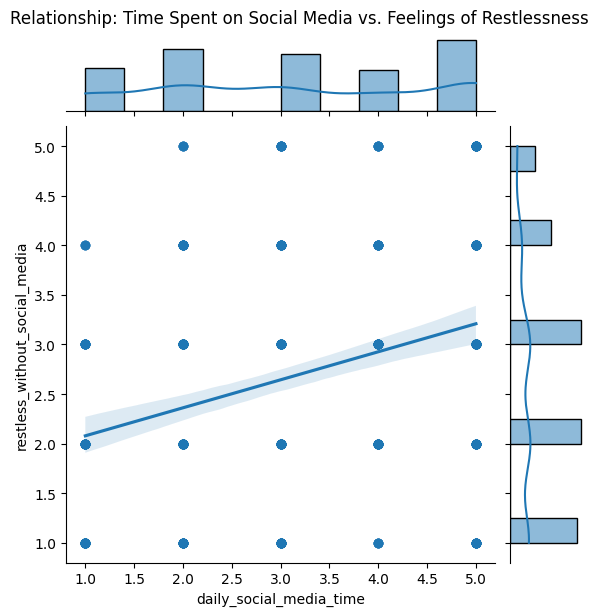

In [ ]:
import seaborn as sns

smmh['daily_social_media_time'] = smmh['daily_social_media_time'].astype(str)
smmh['daily_social_media_time'] = smmh['daily_social_media_time'].str.extract('(\d+)')
smmh['daily_social_media_time'] = pd.to_numeric(smmh['daily_social_media_time'])
correlation = smmh['daily_social_media_time'].corr(smmh['restless_without_social_media'])

print(f"Correlation between Time Spent on Social Media and Feelings of Restlessness: {correlation:.2f}")


plt.figure(figsize=(10, 6))
sns.jointplot(x='daily_social_media_time', y='restless_without_social_media', data=smmh, kind='reg')
plt.suptitle('Relationship: Time Spent on Social Media vs. Feelings of Restlessness', y=1.02)
plt.show()

### Are there any gender-based differences in social media usage patterns and their impact on mental health?

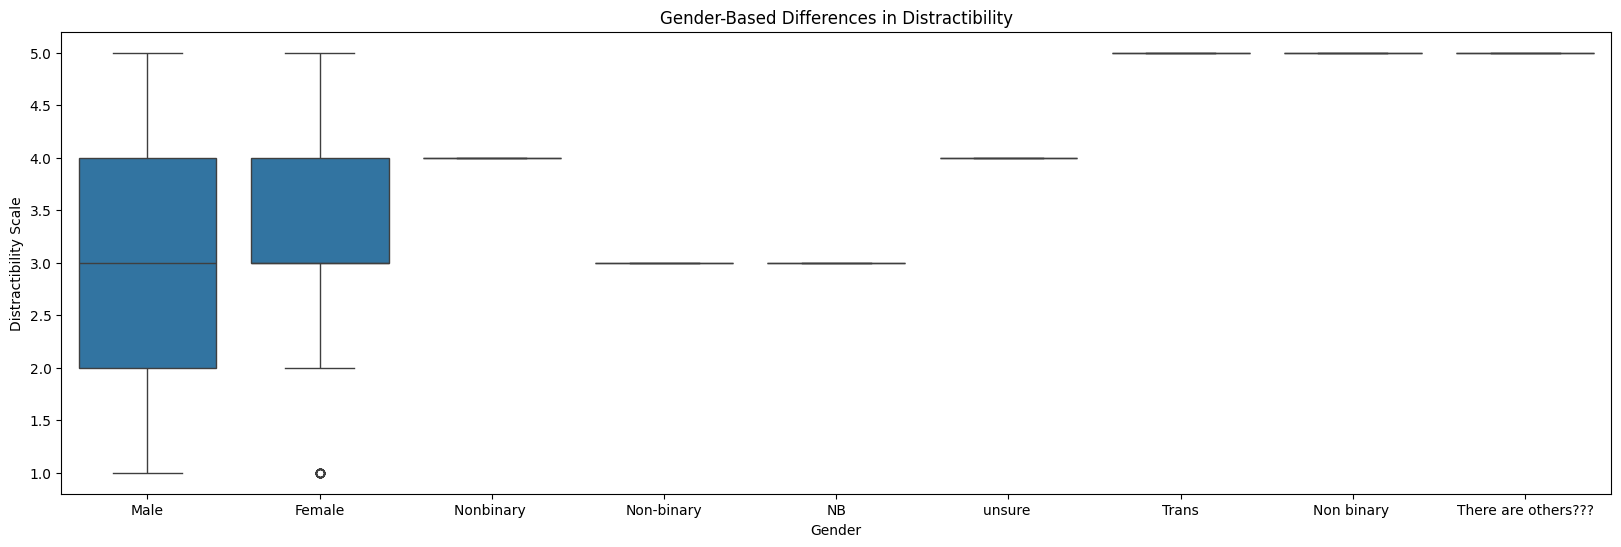

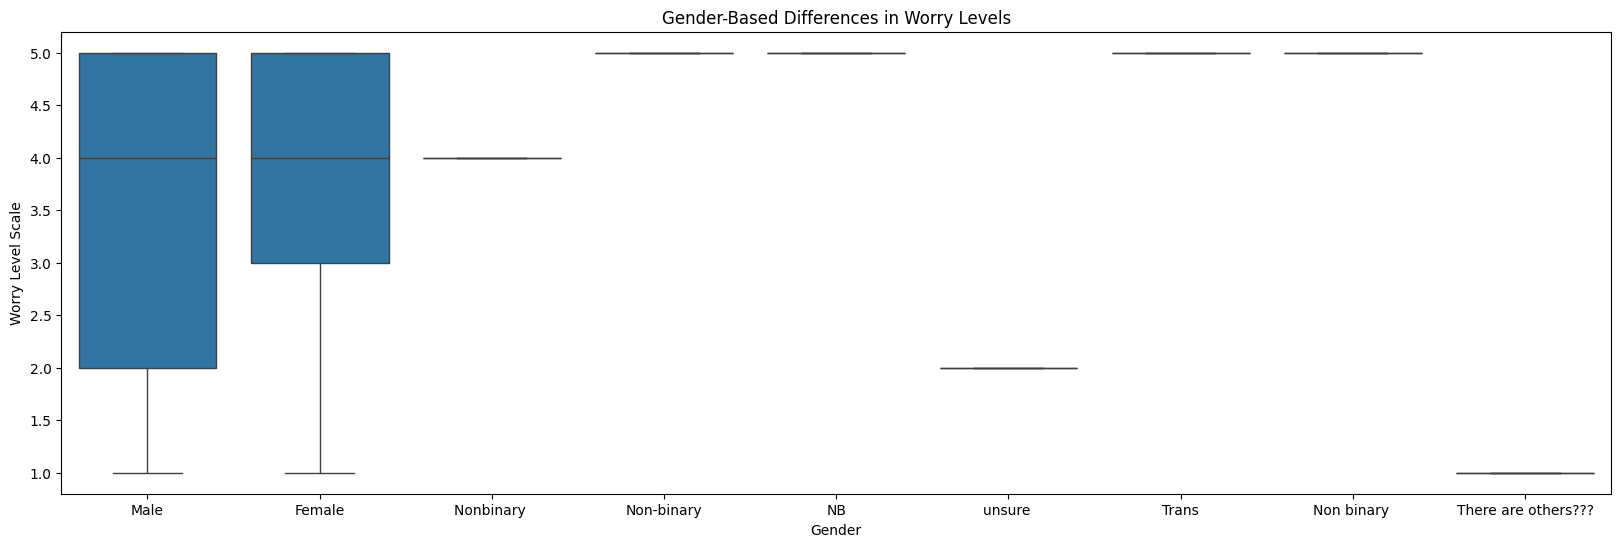

In [ ]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='gender', y='distractibility_scale', data=smmh)
plt.title('Gender-Based Differences in Distractibility')
plt.xlabel('Gender')
plt.ylabel('Distractibility Scale')
plt.show()

plt.figure(figsize=(20, 6))
sns.boxplot(x='gender', y='worry_level_scale', data=smmh)
plt.title('Gender-Based Differences in Worry Levels')
plt.xlabel('Gender')
plt.ylabel('Worry Level Scale')
plt.show()


### Do younger age groups report more frequent distraction by social media during other activities?

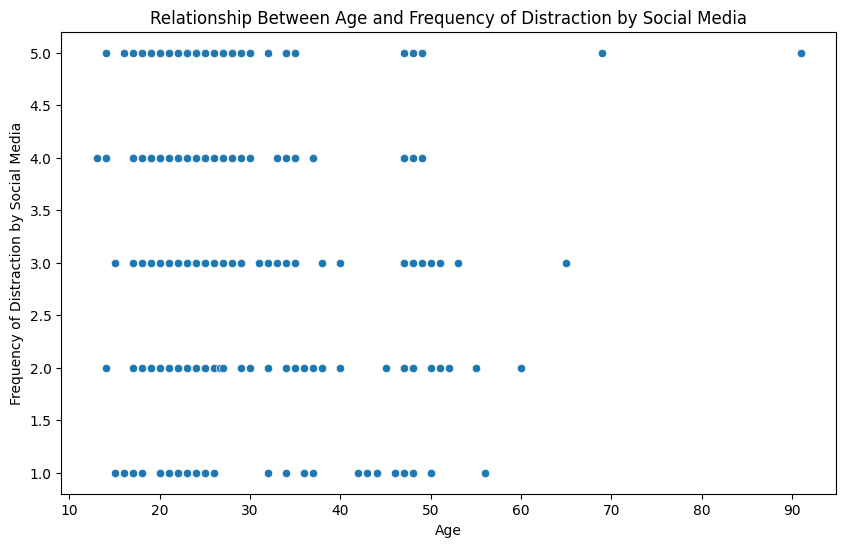

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='frequency_social_media_distracted', data=smmh)
plt.title('Relationship Between Age and Frequency of Distraction by Social Media')
plt.xlabel('Age')
plt.ylabel('Frequency of Distraction by Social Media')
plt.show()


### Are people who affiliate with different types of organizations more or less likely to seek validation from social media?

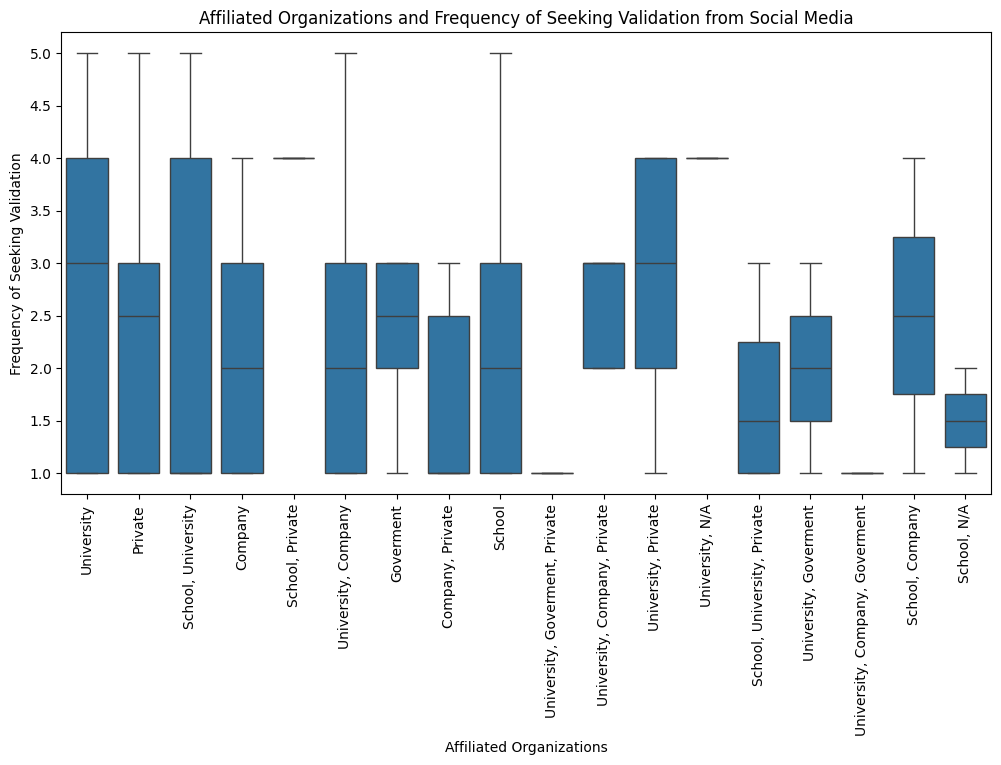

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='affiliated_organizations', y='frequency_seeking_validation', data=smmh)
plt.title('Affiliated Organizations and Frequency of Seeking Validation from Social Media')
plt.xlabel('Affiliated Organizations')
plt.ylabel('Frequency of Seeking Validation')
plt.xticks(rotation=90)
plt.show()


# Advanced Analysis

    1. Can you build a predictive model to determine the likelihood of a person feeling restless when not using social media based on their survey responses?
    2. Are there any significant differences in distractibility or worry levels based on the social media platforms commonly used by respondents?
    3. Can you identify clusters or segments of respondents with similar social media usage and mental health profiles using clustering algorithms?
    4. Investigate the impact of social media usage on self-reported depression levels using regression analysis

### Building a predictive model to determine the likelihood of a person feeling restless when not using social media based on their survey responses?

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler

smmh = smmh.drop('timestamp', axis=1)

categorical_columns = ['gender', 'relationship_status', 'occupation_status', 'affiliated_organizations', 'use_social_media', 'social_media_platforms']
for column in categorical_columns:
    le = LabelEncoder()
    smmh[column] = le.fit_transform(smmh[column])

X = smmh.drop('restless_without_social_media', axis=1)
y = smmh['restless_without_social_media']

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=50, random_state=42, criterion='entropy', min_samples_split=3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)


Accuracy: 0.5802469135802469
              precision    recall  f1-score   support

           1       0.80      0.88      0.84        32
           2       0.00      0.00      0.00         8
           3       0.52      0.64      0.57        22
           4       0.14      0.25      0.18         8
           5       0.75      0.27      0.40        11

    accuracy                           0.58        81
   macro avg       0.44      0.41      0.40        81
weighted avg       0.57      0.58      0.56        81



In [ ]:
y.unique()

array([2, 1, 4, 3, 5])

In [ ]:
y.value_counts()

restless_without_social_media
2    124
3    124
1    117
4     72
5     44
Name: count, dtype: int64

We've successfully improved the model's accuracy from 43% to 58% despite working with a dataset that has 5 imbalanced classes.

### Are there any significant differences in distractibility or worry levels based on the social media platforms commonly used by respondents?

In [ ]:
from scipy.stats import f_oneway

social_media_platforms = smmh['social_media_platforms']
distractibility = smmh['distractibility_scale']
worry_levels = smmh['worry_level_scale']

platforms_data = {}
for platform in social_media_platforms.unique():
    platforms_data[platform] = distractibility[social_media_platforms == platform]

f_statistic, p_value = f_oneway(*platforms_data.values())
print("ANOVA for Distractibility:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


ANOVA for Distractibility:
F-statistic: 1.2696969420938404
P-value: 0.047344447850293236


For Distractibility: The p-value is 0.0473, which is less than the typical significance level of 0.05. This indicates that there are statistically significant differences in Distractibility levels among the different social media platforms.

In [ ]:
platforms_data_worry = {}
for platform in social_media_platforms.unique():
    platforms_data_worry[platform] = worry_levels[social_media_platforms == platform]

f_statistic_worry, p_value_worry = f_oneway(*platforms_data_worry.values())
print("ANOVA for Worry Levels:")
print(f"F-statistic: {f_statistic_worry}")
print(f"P-value: {p_value_worry}")

ANOVA for Worry Levels:
F-statistic: 1.2805634465456277
P-value: 0.041722917961252916


For Worry Levels: The p-value is 0.0417, also less than 0.05. This suggests that there are statistically significant differences in Worry Levels among the different social media platforms.

### Identifying clusters or segments of respondents with similar social media usage and mental health profiles using clustering algorithms?

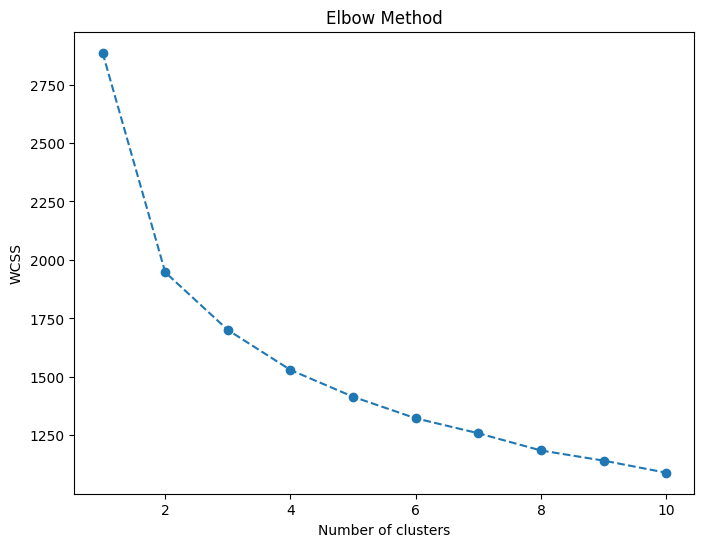

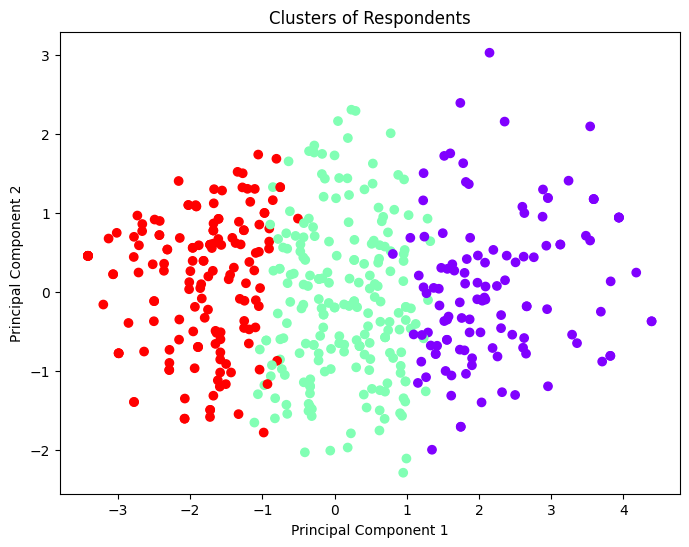

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer


columns_for_clustering = ['daily_social_media_time', 'frequency_social_media_no_purpose', 'frequency_social_media_distracted',
                          'restless_without_social_media', 'distractibility_scale', 'worry_level_scale']

data_for_clustering = smmh[columns_for_clustering]

imputer = SimpleImputer(strategy='mean')
data_for_clustering_imputed = imputer.fit_transform(data_for_clustering)

scaler = StandardScaler()
data_for_clustering_standardized = scaler.fit_transform(data_for_clustering_imputed)

pca = PCA(n_components=2)
data_for_clustering_reduced = pca.fit_transform(data_for_clustering_standardized)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_for_clustering_standardized)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

optimal_num_clusters = 3

kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(data_for_clustering_standardized)

smmh['Cluster'] = cluster_labels

plt.figure(figsize=(8, 6))
plt.scatter(data_for_clustering_reduced[:, 0], data_for_clustering_reduced[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('Clusters of Respondents')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


**Cluster 0 represents respondents with moderate social media usage, lower distractibility, and worry levels.**

**Cluster 1 consists of respondents with higher social media usage and moderately elevated distractibility and worry levels.**

**Cluster 2 includes respondents with the highest social media usage, significantly elevated distractibility, and worry levels.**

### Investigating the impact of social media usage on self-reported depression levels using regression analysis

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

smmh.fillna(smmh.mean(), inplace=True)

smmh.replace([np.inf, -np.inf], np.nan, inplace=True)
smmh.fillna(smmh.mean(), inplace=True)

y = smmh['frequency_feeling_depressed']
X = smmh[['daily_social_media_time', 'frequency_social_media_no_purpose', 'frequency_social_media_distracted']]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:     frequency_feeling_depressed   R-squared:                       0.180
Model:                                     OLS   Adj. R-squared:                  0.175
Method:                          Least Squares   F-statistic:                     34.94
Date:                         Tue, 14 May 2024   Prob (F-statistic):           1.98e-20
Time:                                 14:54:32   Log-Likelihood:                -765.23
No. Observations:                          481   AIC:                             1538.
Df Residuals:                              477   BIC:                             1555.
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------